In [1]:
# import all libraries and modules
import tensorflow as tf 
import pandas as pd  
import numpy as np    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
# tensorflow version
tf.__version__

'2.4.1'

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
fn = '/home/jefire/project/water/input/jide_q_h_data/jiderebode_h_imerge_data_2000_2021.csv'

In [5]:
df = pd.read_csv(fn)
df

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [6]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [7]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [8]:
# get summary statistics
df_copy.describe()

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,2.658584,552.530408,28.678575,28.609405,28.675860,28.618282,255.202328
std,4.021363,330.794236,3.943793,3.947781,3.874746,1.685025,143.615109
min,0.000000,40.271744,16.909994,16.909994,17.863685,25.611789,0.000000
25%,0.024447,211.769856,26.043762,25.939181,26.064920,27.122418,113.000000
50%,0.628331,590.062714,29.649118,29.571434,29.755682,28.390745,304.425000
75%,3.853519,859.759258,31.502815,31.449186,31.393429,30.238243,350.143462
max,26.368990,1120.758299,35.947914,35.947914,35.410259,31.572935,682.000000


In [9]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-9-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    7586
unique                   7586
top       2000-12-24 00:00:00
freq                        1
first     2000-12-24 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [10]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [11]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
date,,,,,,,
2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...
2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00


In [12]:
# drop unwanted dates data
df_copy.drop(df_copy.loc['2000-12-24':'2000-12-31'].index,inplace=True) 
df_copy

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
date,,,,,,,
2001-01-01,0.041924,761.208178,21.818512,29.539700,22.192944,28.360960,335.00
2001-01-02,0.433780,760.571192,21.694710,29.886585,22.060817,28.310038,335.55
2001-01-03,0.026396,758.075647,21.706347,29.683380,21.892465,28.257549,336.00
2001-01-04,0.677911,749.605216,21.556520,30.388618,21.768334,28.204746,336.53
2001-01-05,0.067499,746.766451,21.191872,30.492870,21.615154,28.146621,337.00
...,...,...,...,...,...,...,...
2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00


In [13]:
# split data 70 : 15 : 15 (train, val, test)
# size = int(len(df_copy)*0.8)
size = int(len(df_copy)*0.85)

df_train_val = df_copy.iloc[:size]
df_test = df_copy.iloc[size:]

print(df_train_val.head())
print(df_test.head())
print(len(df_train_val))
print(len(df_test))

               Pt-59      Rt-207         Tt     Tt-129    Tavgt-6  Tavgt-220  \
date                                                                           
2001-01-01  0.041924  761.208178  21.818512  29.539700  22.192944  28.360960   
2001-01-02  0.433780  760.571192  21.694710  29.886585  22.060817  28.310038   
2001-01-03  0.026396  758.075647  21.706347  29.683380  21.892465  28.257549   
2001-01-04  0.677911  749.605216  21.556520  30.388618  21.768334  28.204746   
2001-01-05  0.067499  746.766451  21.191872  30.492870  21.615154  28.146621   

                 H  
date                
2001-01-01  335.00  
2001-01-02  335.55  
2001-01-03  336.00  
2001-01-04  336.53  
2001-01-05  337.00  
                Pt-59      Rt-207         Tt     Tt-129    Tavgt-6  Tavgt-220  \
date                                                                            
2018-08-21  10.467996  679.149189  29.750473  30.904110  29.241839  29.987066   
2018-08-22  11.963393  687.543541  29.856080  30.

In [14]:
# Display Pipeline
set_config(display='diagram')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,6))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(),slice(0,6))
    ],remainder='passthrough')

In [16]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [17]:
#fit data
pipe.fit(df_train_val.iloc[:,:-1])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 6, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 6, None))]))])

In [18]:
# apply transform to train dataset
dataX = pipe.transform(df_train_val.iloc[:,:-1])
print(dataX[0])
print(dataX.shape)

[-5.76018806e-01  3.64258110e-01 -1.38611858e+00  4.77168556e-04
 -1.32654502e+00  1.76770804e-02]
(6441, 6)


In [19]:
scaler = StandardScaler()
scaler.fit(df_train_val[['H']])

StandardScaler()

In [20]:
# Let’s standardize data
dataY = scaler.transform(df_train_val[['H']])
dataY[0]

array([0.6284172])

In [21]:
# let’s allow the model to see / train on the past 90 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90
horizon = 1
TRAIN_SPLIT = len(df_train_val) - len(df_test)  
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(x_train_multi.shape)
print(x_val_multi.shape)

Single window of past history
[[-5.76018806e-01  3.64258110e-01 -1.38611858e+00  4.77168556e-04
  -1.32654502e+00  1.76770804e-02]
 [-8.31683009e-02  3.61456942e-01 -1.42497801e+00  1.13131732e-01
  -1.35554540e+00 -1.21514918e-03]
 [-6.64646224e-01  3.56238333e-01 -1.41965204e+00  4.39642272e-02
  -1.40067071e+00 -2.15503640e-02]
 [ 3.42662247e-02  3.37549850e-01 -1.45723360e+00  3.02073400e-01
  -1.43730656e+00 -4.24186101e-02]
 [-4.80195618e-01  3.30862249e-01 -1.55139264e+00  3.45345175e-01
  -1.47943668e+00 -6.55301794e-02]
 [-1.06192159e+00  3.22982021e-01 -1.61950680e+00  3.39728847e-01
  -1.51945066e+00 -8.65837314e-02]
 [-1.87468930e-01  3.15319754e-01 -1.52720474e+00  2.54178669e-01
  -1.54605344e+00 -1.06892816e-01]
 [-1.35958156e-02  3.10974463e-01 -1.45746824e+00  2.66899072e-01
  -1.55273847e+00 -1.30873872e-01]
 [ 3.43646894e-01  3.05534103e-01 -1.41703620e+00  7.26019521e-01
  -1.55229057e+00 -1.53065478e-01]
 [ 9.52549623e-02  2.90116067e-01 -1.33394395e+00  7.66580046

In [22]:
# reshape input feature for ConvLSTM 
x_train_multi_ConvLSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 1,
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_ConvLSTM.shape)

x_val_multi_ConvLSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 1,
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_ConvLSTM.shape)

(5214, 2, 1, 45, 6)
(1046, 2, 1, 45, 6)


In [23]:
# Prepare CovLSTM2D training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_ConvLSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_ConvLSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [24]:
# Define the ConvLSTM model

ConvLSTM_model = Sequential()
ConvLSTM_model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='swish', 
input_shape=(2, 1, x_train_multi_ConvLSTM.shape[3], x_train_multi_ConvLSTM.shape[4])))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Flatten())
ConvLSTM_model.add(Dense(30, activation='swish'))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Dense(horizon))
ConvLSTM_model.compile(optimizer='adam', loss='mse')

In [25]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ConvLSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [26]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ConvLSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 11s 36ms/step - loss: 0.3412 - val_loss: 0.2236
Epoch 2/500
150/150 [==============================] - 3s 21ms/step - loss: 0.1419 - val_loss: 0.1573
Epoch 3/500
150/150 [==============================] - 3s 21ms/step - loss: 0.1073 - val_loss: 0.1342
Epoch 4/500
150/150 [==============================] - 3s 21ms/step - loss: 0.0947 - val_loss: 0.1243
Epoch 5/500
150/150 [==============================] - 3s 21ms/step - loss: 0.0865 - val_loss: 0.1185
Epoch 6/500
150/150 [==============================] - 3s 21ms/step - loss: 0.0743 - val_loss: 0.1318
Epoch 7/500
150/150 [==============================] - 3s 21ms/step - loss: 0.0712 - val_loss: 0.1398
Epoch 8/500
150/150 [==============================] - 3s 21ms/step - loss: 0.0685 - val_loss: 0.1559
Epoch 9/500
150/150 [==============================] - 3s 21ms/step - loss: 0.0668 - val_loss: 0.1331
Epoch 10/500
150/150 [==============================] - 3s 21ms/step - loss: 0.05

In [27]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

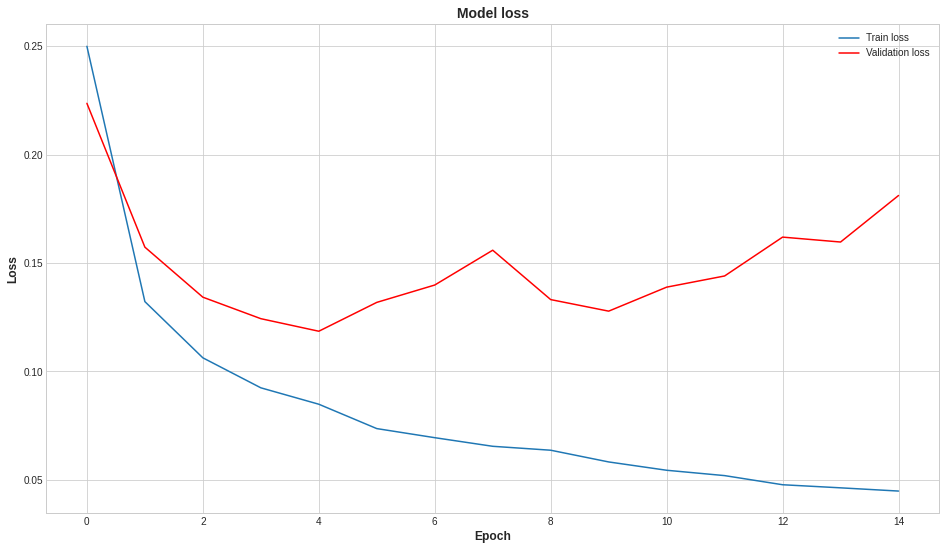

<Figure size 1152x648 with 0 Axes>

In [28]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [29]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 43, 64)         54016     
_________________________________________________________________
dropout (Dropout)            (None, 1, 43, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2752)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                82590     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 136,637
Trainable params: 136,637
Non-trainable params: 0
__________________________________________________

In [30]:
# assign the number of days to validate model
val_period = len(df_test) - hist_window - horizon
val_period

1046

In [31]:
# hold back 5 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test.iloc[:,:].tail(val_period)

In [32]:
# apply transform to test dataset
validateX = pipe.transform(df_test.iloc[:,:-1])

print(validateX[0])
print(validateX.shape)

[ 1.54368918  0.18530774  0.04102979  0.50590549 -0.16060991  0.58611497]
(1137, 6)


In [33]:
# Let’s standardize data
validateY = scaler.transform(df_test[['H']])
validateY[0]

array([1.44762442])

In [34]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(x_test_multi.shape)

Single window of past history
[[ 1.54368918e+00  1.85307743e-01  4.10297866e-02  5.05905487e-01
  -1.60609912e-01  5.86114969e-01]
 [ 1.74395133e+00  1.99767591e-01  7.53311735e-02  3.14604707e-01
  -1.67880808e-01  6.02488795e-01]
 [ 4.21612012e-01  2.13374679e-01  1.52937352e-01  4.25917453e-01
  -9.60601537e-02  6.21377961e-01]
 [ 2.61311892e-01  2.48774443e-01  4.29275623e-01  6.57521427e-01
   8.43877620e-02  6.41349392e-01]
 [ 1.65653520e+00  2.99778982e-01 -2.88842724e-01  8.41103634e-01
   6.23784656e-02  6.53109018e-01]
 [ 1.24002033e+00  3.11075618e-01 -3.73860554e-01  9.12403706e-01
  -6.07483188e-02  6.66619782e-01]
 [ 4.85822889e-01  3.26091600e-01 -3.29754312e-01  1.01561860e+00
  -1.45140179e-01  6.80179491e-01]
 [ 1.23195098e+00  3.52021631e-01 -1.27046465e-01  9.48894539e-01
  -1.71236413e-01  6.93874497e-01]
 [ 1.77097425e+00  3.73132872e-01  8.12151377e-02  1.15338049e+00
  -1.82403296e-01  7.14210715e-01]
 [ 1.92376273e+00  4.03767180e-01 -8.10654447e-02  1.42211680

In [35]:
# reshape for ConvLSTM2D
x_test_multi_ConvLSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 1,
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_ConvLSTM.shape)

(1046, 2, 1, 45, 6)


In [36]:
# predictions for ConvLSTM2D

predictions = []
for i in x_test_multi_ConvLSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2], i.shape[3])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.33606288]]


In [37]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [38]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[294.31628]
(1046, 1)


In [39]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81333652]
KGE' is : [0.84620858]
r is : [0.9176573], gamma is : [1.11222096]
KGE is : [0.88767659]
alpha is : [1.0394752], beta is : [0.93459406]
PBIAS is : [6.54059398]
RMSE is : 67.84107100337691
MARE is : [0.14421804]
MSE is : 4602.410914885228
MAE is : 40.8476235805147
MAPE is : 19.611250794229075
R2 is : 0.8133365168263585



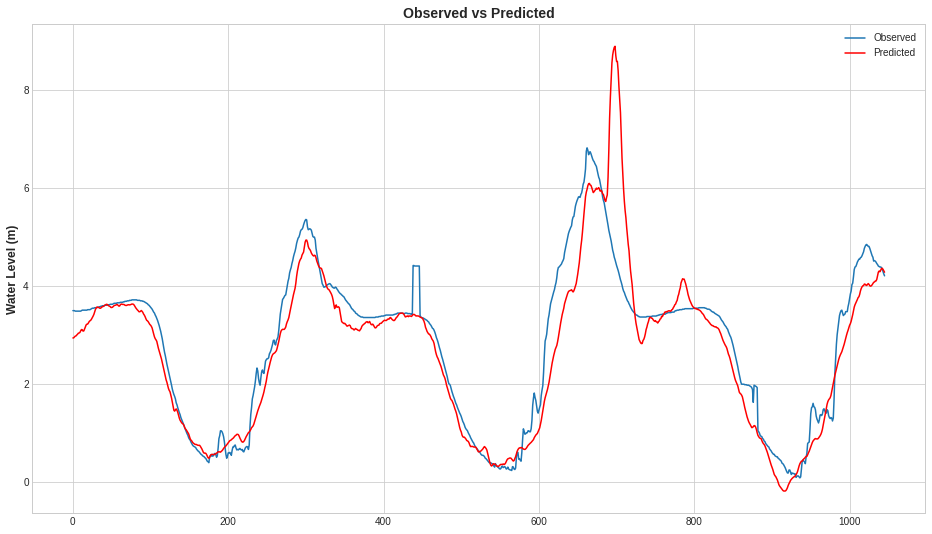

<Figure size 1152x648 with 0 Axes>

In [40]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [41]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ConvLSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)

In [42]:
# Hybrid CNN LSTM

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [43]:
# reshape input feature for Hybrid CNN LSTM 
x_train_multi_CNN_LSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_LSTM.shape)

x_val_multi_CNN_LSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_LSTM.shape)

(5214, 2, 45, 6)
(1046, 2, 45, 6)


In [44]:
# Prepare  CNN LSTM training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_LSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_LSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [45]:
# Define the CNN LSTM model

CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='swish',
input_shape=(None, x_train_multi_CNN_LSTM.shape[2], x_train_multi_CNN_LSTM.shape[3]))))
CNN_LSTM_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_LSTM_model.add(TimeDistributed(Dropout(0.2)))
CNN_LSTM_model.add(TimeDistributed(Flatten()))
CNN_LSTM_model.add(LSTM(units=100,activation='swish'))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(horizon))
CNN_LSTM_model.compile(optimizer='adam', loss='mse')

In [46]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [47]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_LSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 5s 17ms/step - loss: 0.3587 - val_loss: 0.1694
Epoch 2/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0889 - val_loss: 0.1299
Epoch 3/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0601 - val_loss: 0.1328
Epoch 4/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0515 - val_loss: 0.1252
Epoch 5/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0431 - val_loss: 0.1239
Epoch 6/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0362 - val_loss: 0.1650
Epoch 7/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0329 - val_loss: 0.1689
Epoch 8/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0313 - val_loss: 0.2120
Epoch 9/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0284 - val_loss: 0.2010
Epoch 10/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0237 - val_l

In [48]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

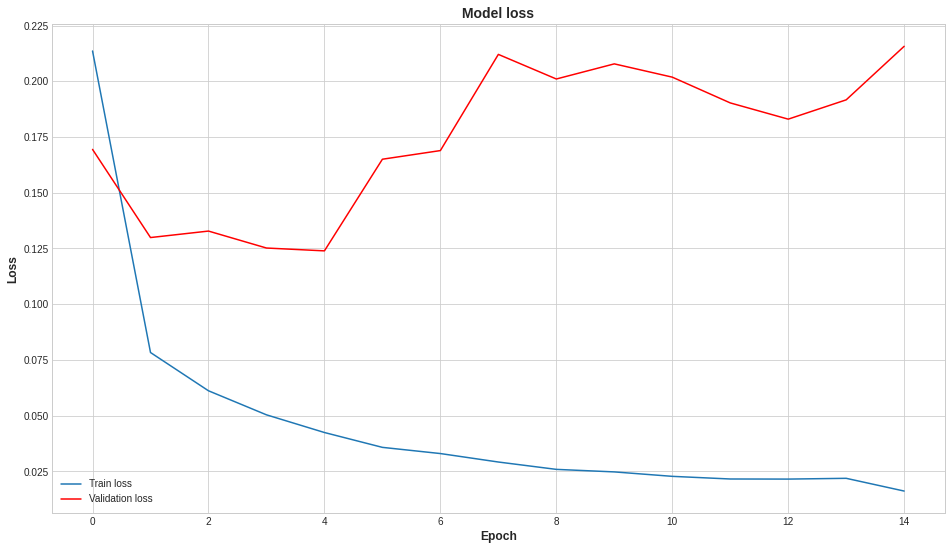

<Figure size 1152x648 with 0 Axes>

In [49]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [50]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 2, 43, 64)         1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               578000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [51]:
# reshape for Hybrid CNN LSTM
x_test_multi_CNN_LSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_LSTM.shape)
print(len(x_test_multi_CNN_LSTM))

(1046, 2, 45, 6)
1046


In [52]:
# predictions for hybrid CNN LSTM

predictions = []
for i in x_test_multi_CNN_LSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5682365]]


In [53]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [54]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[326.6253]
(1046, 1)


In [55]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.70399264]
KGE' is : [0.82702584]
r is : [0.87506215], gamma is : [1.11957657]
KGE is : [0.82431812]
alpha is : [1.12346101], beta is : [1.0034695]
PBIAS is : [-0.34694951]
RMSE is : 85.43075921876513
MARE is : [0.16499353]
MSE is : 7298.414620694623
MAE is : 46.73197311470659
MAPE is : 21.444409225023193
R2 is : 0.703992642130638



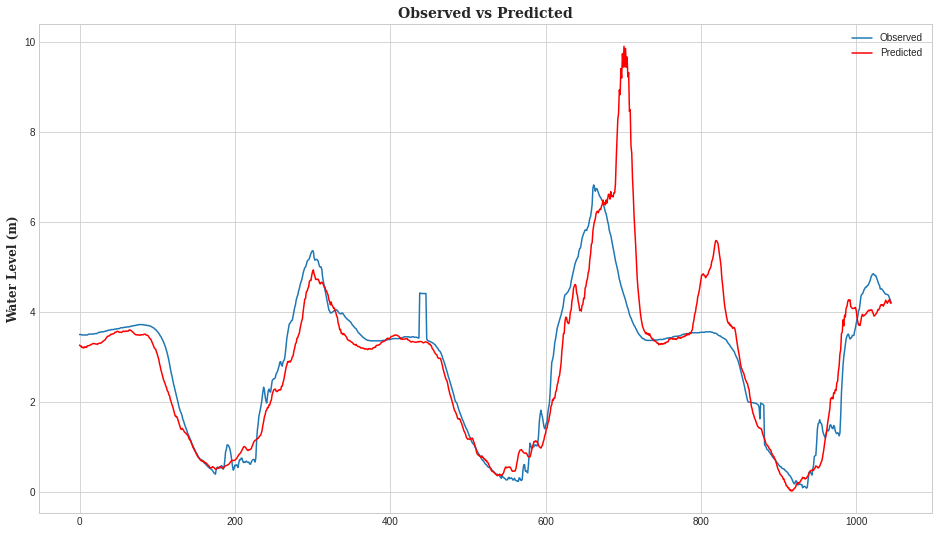

<Figure size 1152x648 with 0 Axes>

In [56]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold',family='serif')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold',family='serif')
plt.legend(('Observed','Predicted'))  # plt.legend(('Observed','predicted'), loc=' upper left ')
plt.figure(figsize=(16,9))
plt.show()

In [57]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)

In [58]:
# Hybrid CNN GRU

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [59]:
# tensorflow version
tf.__version__

'2.4.1'

In [60]:
# reshape input feature for Hybrid CNN GRU 
x_train_multi_CNN_GRU = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_GRU.shape)

x_val_multi_CNN_GRU = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_GRU.shape)
print(len(x_val_multi_CNN_GRU))

(5214, 2, 45, 6)
(1046, 2, 45, 6)
1046


In [61]:
# Prepare  CNN GRU training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_GRU, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_GRU, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [62]:
# Define the CNN GRU model

CNN_GRU_model = Sequential()
CNN_GRU_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='swish',
input_shape=(None, x_train_multi_CNN_GRU.shape[2], x_train_multi_CNN_GRU.shape[3]))))
CNN_GRU_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_GRU_model.add(TimeDistributed(Dropout(0.2)))
CNN_GRU_model.add(TimeDistributed(Flatten()))
CNN_GRU_model.add(GRU(units=100,activation='swish'))
CNN_GRU_model.add(Dropout(0.2))
CNN_GRU_model.add(Dense(horizon))
CNN_GRU_model.compile(optimizer='adam', loss='mse')

In [63]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_GRU_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [64]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 3s 11ms/step - loss: 0.2871 - val_loss: 0.1771
Epoch 2/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0875 - val_loss: 0.1533
Epoch 3/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0591 - val_loss: 0.1430
Epoch 4/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0518 - val_loss: 0.1522
Epoch 5/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0517 - val_loss: 0.1632
Epoch 6/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0359 - val_loss: 0.2012
Epoch 7/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0289 - val_loss: 0.1978
Epoch 8/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0225 - val_loss: 0.1926
Epoch 9/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0238 - val_loss: 0.2044
Epoch 10/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0170 - val_l

In [65]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

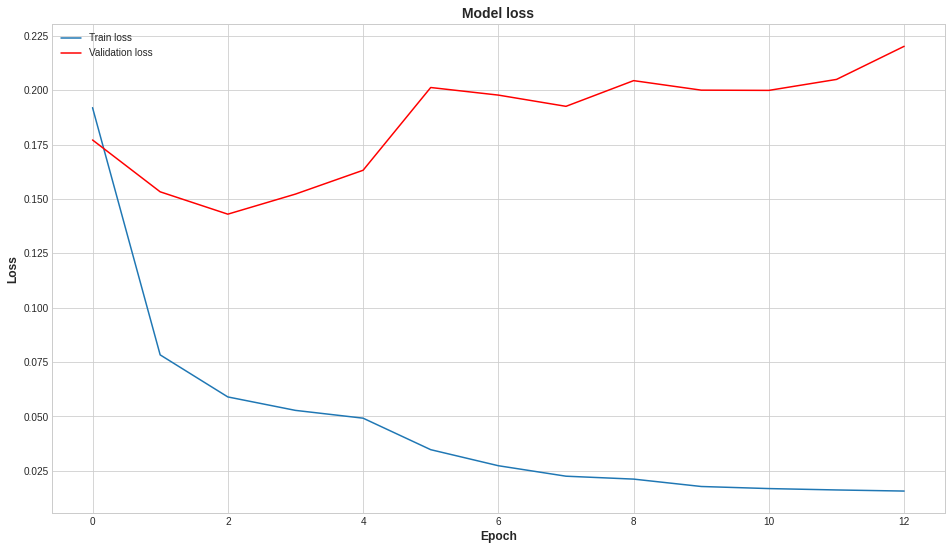

<Figure size 1152x648 with 0 Axes>

In [66]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [67]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 43, 64)         1216      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
gru (GRU)                    (None, 100)               433800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [68]:
# reshape for Hybrid CNN GRU
x_test_multi_CNN_GRU = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_GRU.shape)
print(len(x_test_multi_CNN_GRU))

(1046, 2, 45, 6)
1046


In [69]:
# predictions for hybrid CNN GRU

predictions = []
for i in x_test_multi_CNN_GRU:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5664296]]


In [70]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [71]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[326.37387]
(1046, 1)


In [72]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.87026451]
KGE' is : [0.92572525]
r is : [0.93565797], gamma is : [0.99943349]
KGE is : [0.91673107]
alpha is : [0.96235299], beta is : [0.96289851]
PBIAS is : [3.71014884]
RMSE is : 56.557786940891205
MARE is : [0.13865249]
MSE is : 3198.7832636512435
MAE is : 39.27126197012615
MAPE is : 27.388542003552026
R2 is : 0.8702645120235685



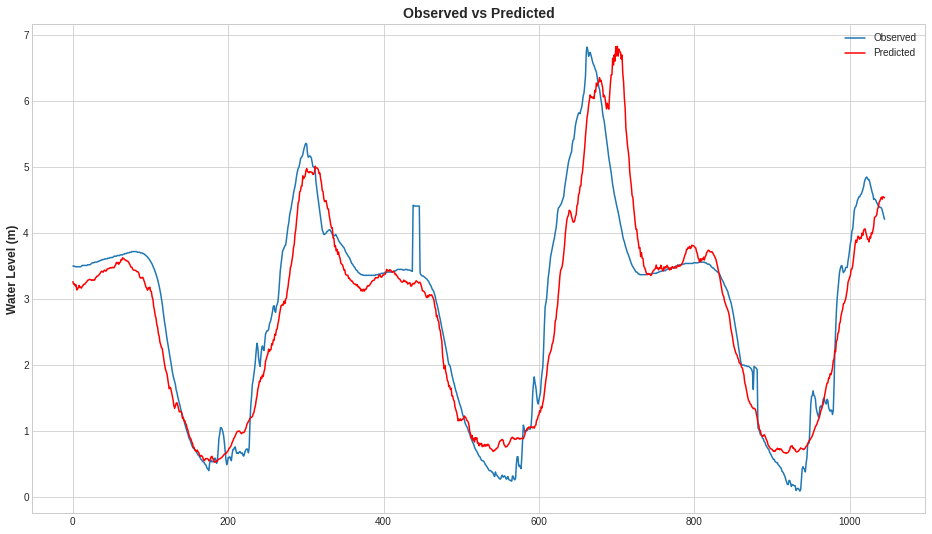

<Figure size 1152x648 with 0 Axes>

In [73]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [74]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_GRU_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)

In [75]:
# 4th Model
# Auto-encoder LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [76]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [77]:
# Define the Auto-encoder LSTM model

# Define the auto-encoder LSTM model.
ED_lstm_model = Sequential([
    LSTM(40, activation='swish',input_shape=x_train_multi.shape[-2:], 
    return_sequences=True),
    LSTM(units=20,activation='swish',return_sequences=True),
    LSTM(units=15),
    RepeatVector(y_train_multi.shape[1]),
    LSTM(units=40,activation='swish',return_sequences=True),
    LSTM(units=25,activation='swish',return_sequences=True),
    TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')

In [78]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ED_LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [79]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 39s 228ms/step - loss: 0.8604 - val_loss: 0.3262
Epoch 2/500
150/150 [==============================] - 33s 222ms/step - loss: 0.1968 - val_loss: 0.2215
Epoch 3/500
150/150 [==============================] - 34s 229ms/step - loss: 0.1421 - val_loss: 0.2177
Epoch 4/500
150/150 [==============================] - 34s 223ms/step - loss: 0.1347 - val_loss: 0.2092
Epoch 5/500
150/150 [==============================] - 34s 225ms/step - loss: 0.1358 - val_loss: 0.2143
Epoch 6/500
150/150 [==============================] - 34s 224ms/step - loss: 0.1272 - val_loss: 0.2199
Epoch 7/500
150/150 [==============================] - 33s 223ms/step - loss: 0.1157 - val_loss: 0.2383
Epoch 8/500
150/150 [==============================] - 34s 224ms/step - loss: 0.1131 - val_loss: 0.2434
Epoch 9/500
150/150 [==============================] - 34s 225ms/step - loss: 0.1062 - val_loss: 0.2265
Epoch 10/500
150/150 [==============================] - 34s 226m

In [80]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

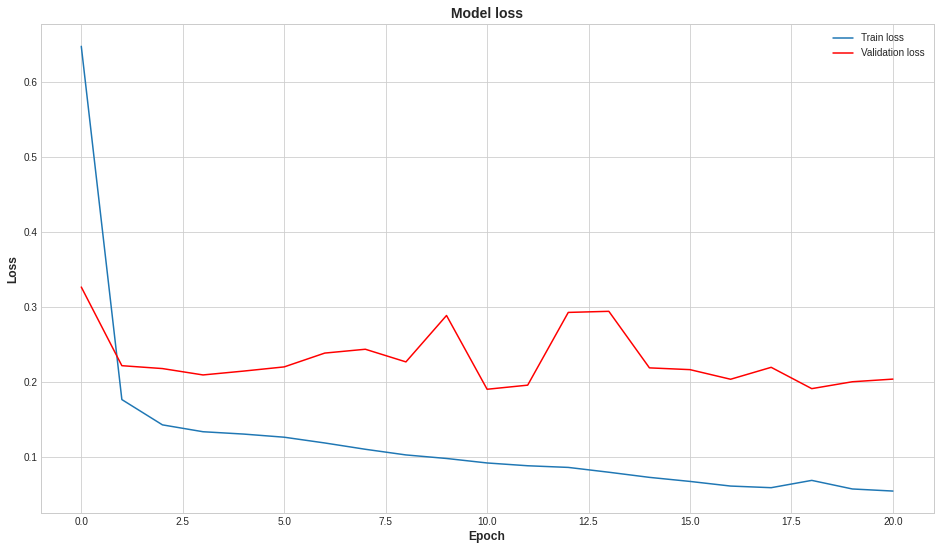

<Figure size 1152x648 with 0 Axes>

In [81]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [82]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 90, 40)            7520      
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 20)            4880      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

In [83]:
# predictions for AutoEncoder

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[[0.57381034]]]


In [84]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [85]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[327.40097]
(1046, 1)
1046


In [86]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.80545214]
KGE' is : [0.81542402]
r is : [0.9459267], gamma is : [0.88338452]
KGE is : [0.7260461]
alpha is : [0.76637292], beta is : [0.86754169]
PBIAS is : [13.2458308]
RMSE is : 69.25900461102572
MARE is : [0.1693717]
MSE is : 4796.8097197100815
MAE is : 47.9720248847801
MAPE is : 28.673203105848966
R2 is : 0.8054521365081997



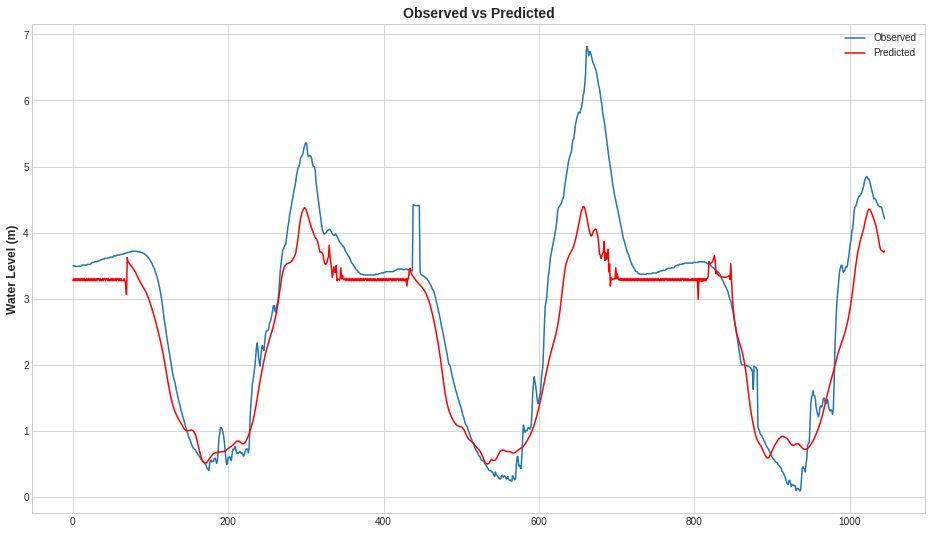

<Figure size 1152x648 with 0 Axes>

In [87]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [88]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ED_LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)

In [89]:
# 5th Model
# CNN Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [90]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [91]:
# Define the CNN model

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='swish',
input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
CNN_model.add(MaxPool1D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30, activation='swish'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(horizon))
CNN_model.compile(optimizer='adam', loss='mse')

In [92]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [93]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 3s 14ms/step - loss: 0.2759 - val_loss: 0.2291
Epoch 2/500
150/150 [==============================] - 1s 5ms/step - loss: 0.1406 - val_loss: 0.1544
Epoch 3/500
150/150 [==============================] - 1s 5ms/step - loss: 0.1013 - val_loss: 0.1361
Epoch 4/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0898 - val_loss: 0.1476
Epoch 5/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0807 - val_loss: 0.1650
Epoch 6/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0751 - val_loss: 0.2188
Epoch 7/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0756 - val_loss: 0.3060
Epoch 8/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0802 - val_loss: 0.2042
Epoch 9/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0715 - val_loss: 0.1581
Epoch 10/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0635 - val_l

In [94]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

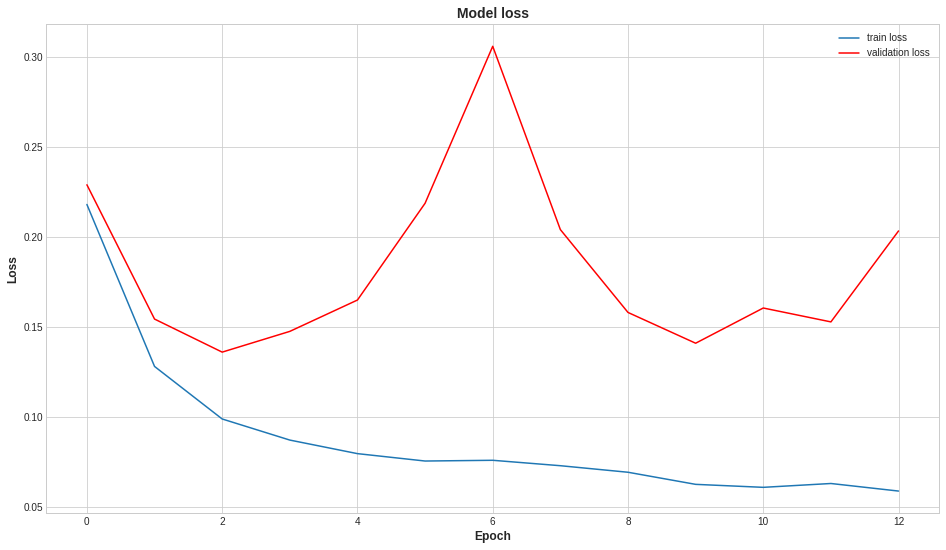

<Figure size 1152x648 with 0 Axes>

In [95]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [96]:
# Check the model summary
Trained_model.summary()

# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(y_test_multi))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 88, 64)            1216      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 44, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 44, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                84510     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [97]:
# predictions for CNN

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.43808004]]


In [98]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [99]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[308.51288]
(1046, 1)
1046


In [100]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.82808187]
KGE' is : [0.89962372]
r is : [0.91395503], gamma is : [0.97665869]
KGE is : [0.8808079]
alpha is : [0.93161744], beta is : [0.95388228]
PBIAS is : [4.6117717]
RMSE is : 65.10642592781379
MARE is : [0.16350133]
MSE is : 4238.846697093904
MAE is : 46.30932753582985
MAPE is : 28.575484784569845
R2 is : 0.8280818675795346



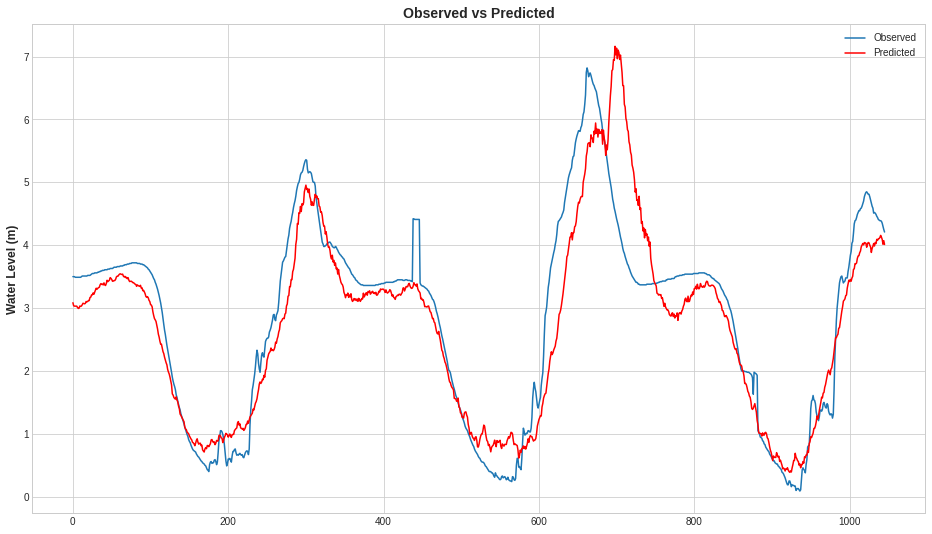

<Figure size 1152x648 with 0 Axes>

In [101]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [102]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)

In [103]:
# 6th Model
# LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [104]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [105]:
# Define the LSTM model

lstm_multi = Sequential()
lstm_multi.add(LSTM(
    150,activation='swish',input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(LSTM(units=100,activation='swish',return_sequences=False)),
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [106]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [107]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 35s 217ms/step - loss: 0.4208 - val_loss: 0.1984
Epoch 2/500
150/150 [==============================] - 32s 216ms/step - loss: 0.1491 - val_loss: 0.1742
Epoch 3/500
150/150 [==============================] - 32s 216ms/step - loss: 0.1212 - val_loss: 0.1587
Epoch 4/500
150/150 [==============================] - 32s 216ms/step - loss: 0.1071 - val_loss: 0.1498
Epoch 5/500
150/150 [==============================] - 32s 214ms/step - loss: 0.0944 - val_loss: 0.1416
Epoch 6/500
150/150 [==============================] - 32s 216ms/step - loss: 0.0783 - val_loss: 0.1889
Epoch 7/500
150/150 [==============================] - 32s 215ms/step - loss: 0.0733 - val_loss: 0.1510
Epoch 8/500
150/150 [==============================] - 32s 216ms/step - loss: nan - val_loss: nan
Epoch 9/500
150/150 [==============================] - 32s 217ms/step - loss: nan - val_loss: nan
Epoch 10/500
150/150 [==============================] - 33s 218ms/step - los

In [108]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

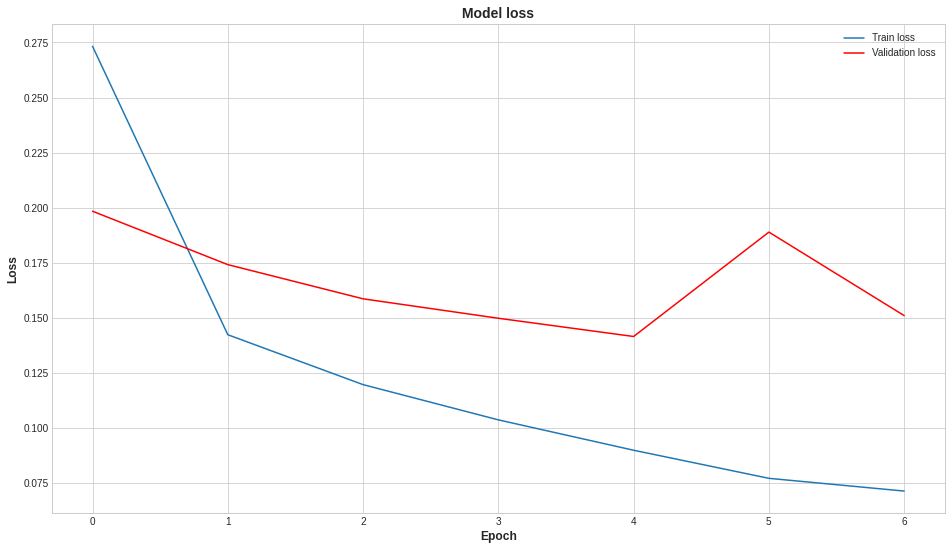

<Figure size 1152x648 with 0 Axes>

In [109]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [110]:
# Check the model summary
Trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 90, 150)           94200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 90, 150)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 194,701
Trainable params: 194,701
Non-trainable params: 0
_________________________________________________________________


In [111]:
# predictions for LSTM

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.56824666]]


In [112]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [113]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[326.62674]
(1046, 1)
1046


In [114]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.55834239]
KGE' is : [0.73126782]
r is : [0.81123228], gamma is : [1.18046749]
KGE is : [0.77458077]
alpha is : [1.10566628], beta is : [0.93663426]
PBIAS is : [6.33657375]
RMSE is : 104.35322435725084
MARE is : [0.23681617]
MSE is : 10889.595433754728
MAE is : 67.07467208173033
MAPE is : 27.61682737584767
R2 is : 0.558342388020534



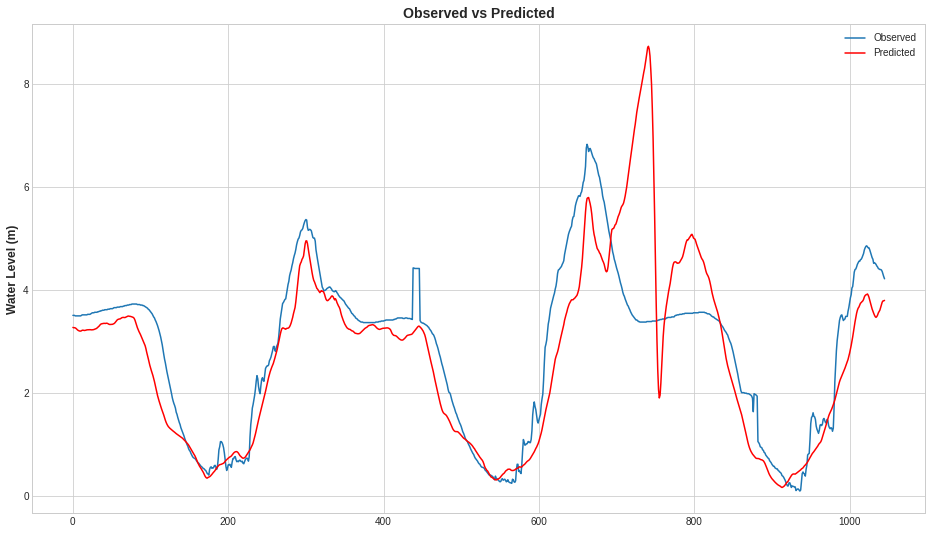

<Figure size 1152x648 with 0 Axes>

In [115]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [116]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)

In [117]:
# 7th Model
# GRU Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [118]:
# # Define the GRU model

GRU_model = Sequential([
    GRU(100, activation='swish', input_shape=x_train_multi.shape[-2:],return_sequences=True),
    Dropout(0.2),
    GRU(units=50,activation='swish', return_sequences=False),
    Dropout(0.2),
    Dense(units=horizon),
])
GRU_model.compile(optimizer='adam', loss='mse')

In [119]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/GRU_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [120]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 40s 252ms/step - loss: 0.3166 - val_loss: 0.1846
Epoch 2/500
150/150 [==============================] - 38s 251ms/step - loss: 0.1455 - val_loss: 0.1578
Epoch 3/500
150/150 [==============================] - 37s 248ms/step - loss: 0.1124 - val_loss: 0.1339
Epoch 4/500
150/150 [==============================] - 37s 249ms/step - loss: 0.0947 - val_loss: 0.1303
Epoch 5/500
150/150 [==============================] - 37s 249ms/step - loss: 0.0786 - val_loss: 0.1218
Epoch 6/500
150/150 [==============================] - 37s 248ms/step - loss: 0.0690 - val_loss: 0.1252
Epoch 7/500
150/150 [==============================] - 37s 246ms/step - loss: 0.0636 - val_loss: 0.1464
Epoch 8/500
150/150 [==============================] - 37s 246ms/step - loss: 0.0653 - val_loss: 0.1461
Epoch 9/500
150/150 [==============================] - 37s 245ms/step - loss: 0.0600 - val_loss: 0.1546
Epoch 10/500
150/150 [==============================] - 37s 246m

In [121]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

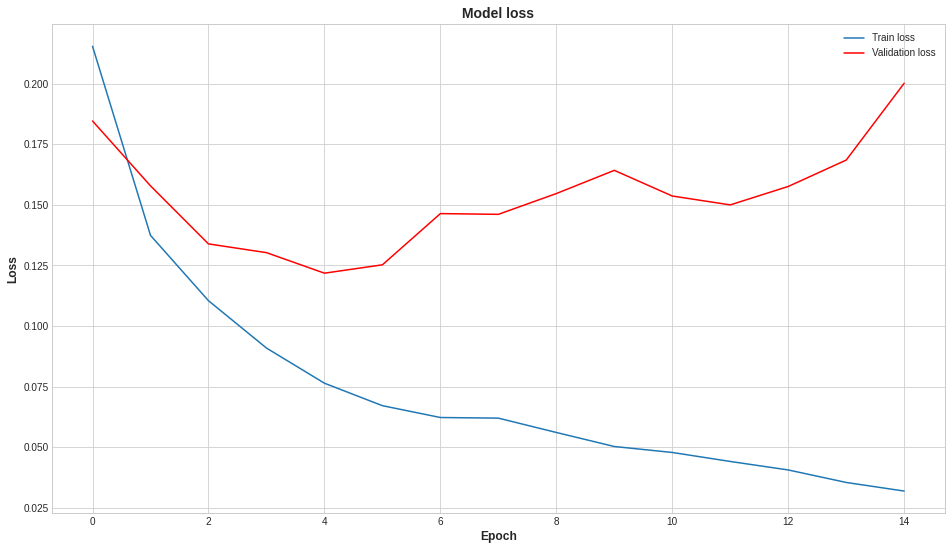

<Figure size 1152x648 with 0 Axes>

In [122]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [123]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 90, 100)           32400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 55,251
Trainable params: 55,251
Non-trainable params: 0
_________________________________________________________________


In [124]:
# predictions for GRU

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.6136366]]


In [125]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [126]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[332.94315]
(1046, 1)
1046


In [127]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.21438861]
KGE' is : [0.6078686]
r is : [0.75252509], gamma is : [1.30258294]
KGE is : [0.5758334]
alpha is : [1.3430841], beta is : [1.03109292]
PBIAS is : [-3.10929238]
RMSE is : 139.17681662375534
MARE is : [0.25355568]
MSE is : 19370.18628552242
MAE is : 71.81588865466145
MAPE is : 34.15061804834284
R2 is : 0.21438860878677513



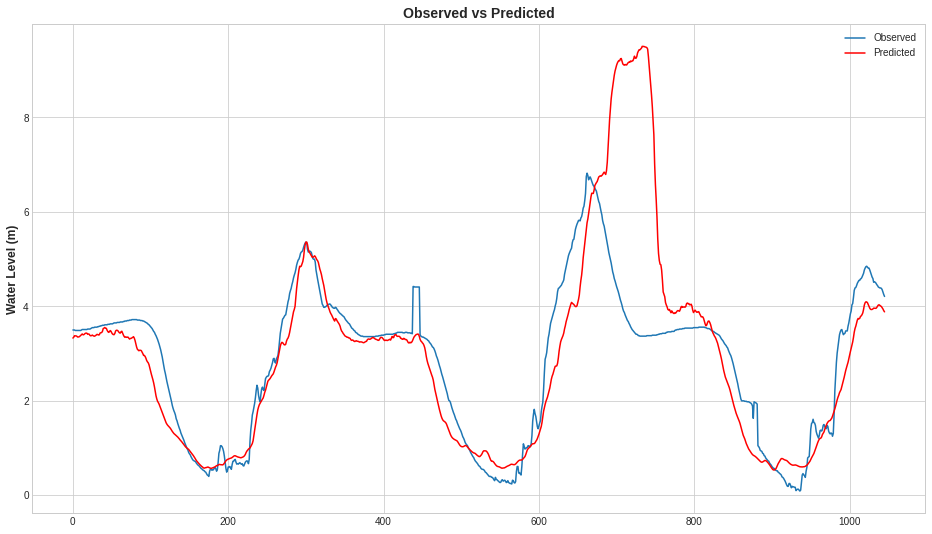

<Figure size 1152x648 with 0 Axes>

In [128]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [129]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/GRU_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)

In [130]:
# 8th Model Bidirectional LSTM

# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [131]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [132]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, activation='swish',
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='swish')),
tf.keras.layers.Dense(20, activation='swish'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [133]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard.h5'

In [134]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 65s 408ms/step - loss: 10679987812338.5156 - val_loss: 0.3631
Epoch 2/500
150/150 [==============================] - 61s 409ms/step - loss: 0.3758 - val_loss: 0.3083
Epoch 3/500
150/150 [==============================] - 61s 409ms/step - loss: 0.3307 - val_loss: 0.2890
Epoch 4/500
150/150 [==============================] - 61s 410ms/step - loss: 0.3091 - val_loss: 0.2757
Epoch 5/500
150/150 [==============================] - 60s 400ms/step - loss: 0.3042 - val_loss: 0.2635
Epoch 6/500
150/150 [==============================] - 60s 402ms/step - loss: 0.2764 - val_loss: 0.2516
Epoch 7/500
150/150 [==============================] - 60s 400ms/step - loss: 0.2518 - val_loss: 0.2411
Epoch 8/500
150/150 [==============================] - 60s 402ms/step - loss: 0.2434 - val_loss: 0.2324
Epoch 9/500
150/150 [==============================] - 60s 402ms/step - loss: 0.2457 - val_loss: 0.2240
Epoch 10/500
150/150 [=============================

In [135]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

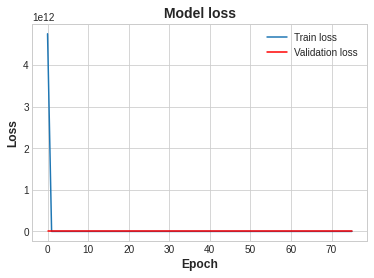

<Figure size 1152x648 with 0 Axes>

In [136]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [137]:
# Check the model summary
Trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 90, 300)           188400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 330,841
Trainable params: 330,841
Non-trainable params: 0
_________________________________________________________________


In [138]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.8764509]]


In [139]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [140]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[369.5161]
(1046, 1)


In [141]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [-2.26688571e+08]
KGE' is : [-1112.36196665]
r is : [0.05472628], gamma is : [13.3912001]
KGE is : [-14961.19279808]
alpha is : [14921.71679688], beta is : [1114.29260907]
PBIAS is : [-111329.26090674]
RMSE is : 2364165.2335557486
MARE is : [1113.60193852]
MSE is : 5589277251553.707
MAE is : 315411.2473362181
MAPE is : 90906.49266450858
R2 is : -226688571.46620494



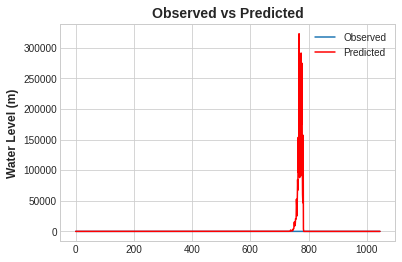

<Figure size 1152x648 with 0 Axes>

In [142]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [143]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_H_1step_90days_gpm_swish_standard_history.csv', index=False)